In [1]:
import requests
import pandas as pd
import geopandas as gpd
from shapely import wkt

cookies = {
    'utag_main__sn': '1',
    'utag_main_ses_id': '1759190774539%3Bexp-session',
    'split_segmentation': 'FAB',
    'utag_main_vapi_domain': 'metrocuadrado.com',
    'at_check': 'true',
    'utag_main__ss': '0%3Bexp-session',
    '_ga': 'GA1.1.1723186862.1759190777',
    '_hjSession_3298791': 'eyJpZCI6ImNkNjJmMTA5LTkwNWYtNDZjYi05NzM2LWExYTU1MGFkNDk0NCIsImMiOjE3NTkxOTA3Nzc1MzEsInMiOjAsInIiOjAsInNiIjowLCJzciI6MCwic2UiOjAsImZzIjoxLCJzcCI6MH0=',
    'utag_main_v_id': '019997f0fef40034be6ec5bdf2f40506f004606700bd0',
    'utag_main_dc_visit': '1',
    '_gcl_au': '1.1.1340364105.1759190778',
    'utag_main_dc_region': 'us-east-1%3Bexp-session',
    'disclaimerCookies': 'true',
    'canary_param': 'false',
    'utag_main__pn': '2%3Bexp-session',
    'mbox': 'session#18d0a1531b534edfa52e1d30995c2f70#1759192954|PC#18d0a1531b534edfa52e1d30995c2f70.35_0#1822435894',
    '_hjSessionUser_3298791': 'eyJpZCI6IjkwZDkyMTBjLTcwNzItNTM1ZS1iMDFjLTM3NjAxNTBkNTliMSIsImNyZWF0ZWQiOjE3NTkxOTA3Nzc1MzAsImV4aXN0aW5nIjp0cnVlfQ==',
    'utag_main_dc_event': '2%3Bexp-session',
    'cto_bundle': 'a72py19FdUdibjZlSEhpQUcyQ3FQUkJiVUtpJTJGTkQwJTJCbEtmRUVidkJjVEVxeWxoN3JWWDI4YnIwNkhGS2hseW83cFglMkZDJTJCJTJGS2hhcVlOdENjNG9QdUhJJTJCQURGU2xUYVVvOTFKQ2pJbDQ3aTNxdzZaQlRDc0xiJTJGT2M2aXYzWVdJZEw0VTBtbEd3WWp4dmYlMkJPdzlqRzBUVXVPSFNEZ0ExUGYwbmlXWmVvTFU2WkJmaW1FJTNE',
    'AWSALB': 'oQy7tnOnwBWCXngTqYDy3ObtgNC1bG5OZxCbXGCyqwZhwBS+YqFTDxIdITXaR+iGLf6MwLUmXF5cp656Z7NxD3RR+Gc5kJHeKuc1F0AflDQOOojdcw0wfCQkSqyAEyletuIjgTTYKggqt1RJ+N4dhJGPZbhCpU8odtbeQ/1hN/nCVQQs2jVwBCDrgmhoMg==',
    'utag_main__se': '30%3Bexp-session',
    'utag_main__st': '1759193014703%3Bexp-session',
    '_ga_02LQXVPQF9': 'GS2.1.s1759190777$o1$g1$t1759191255$j19$l0$h0',
}

headers = {
    'accept': '*/*',
    'accept-language': 'es,es-ES;q=0.9,en;q=0.8',
    'content-type': 'application/json',
    'priority': 'u=1, i',
    'referer': 'https://www.metrocuadrado.com/inmuebles/arriendo/medellin/?search=form',
    'sec-ch-ua': '"Chromium";v="140", "Not=A?Brand";v="24", "Google Chrome";v="140"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36',
    'x-api-key': 'P1MfFHfQMOtL16Zpg36NcntJYCLFm8FqFfudnavl',
    # 'cookie': 'utag_main__sn=1; utag_main_ses_id=1759190774539%3Bexp-session; split_segmentation=FAB; utag_main_vapi_domain=metrocuadrado.com; at_check=true; utag_main__ss=0%3Bexp-session; _ga=GA1.1.1723186862.1759190777; _hjSession_3298791=eyJpZCI6ImNkNjJmMTA5LTkwNWYtNDZjYi05NzM2LWExYTU1MGFkNDk0NCIsImMiOjE3NTkxOTA3Nzc1MzEsInMiOjAsInIiOjAsInNiIjowLCJzciI6MCwic2UiOjAsImZzIjoxLCJzcCI6MH0=; utag_main_v_id=019997f0fef40034be6ec5bdf2f40506f004606700bd0; utag_main_dc_visit=1; _gcl_au=1.1.1340364105.1759190778; utag_main_dc_region=us-east-1%3Bexp-session; disclaimerCookies=true; canary_param=false; utag_main__pn=2%3Bexp-session; mbox=session#18d0a1531b534edfa52e1d30995c2f70#1759192954|PC#18d0a1531b534edfa52e1d30995c2f70.35_0#1822435894; _hjSessionUser_3298791=eyJpZCI6IjkwZDkyMTBjLTcwNzItNTM1ZS1iMDFjLTM3NjAxNTBkNTliMSIsImNyZWF0ZWQiOjE3NTkxOTA3Nzc1MzAsImV4aXN0aW5nIjp0cnVlfQ==; utag_main_dc_event=2%3Bexp-session; cto_bundle=a72py19FdUdibjZlSEhpQUcyQ3FQUkJiVUtpJTJGTkQwJTJCbEtmRUVidkJjVEVxeWxoN3JWWDI4YnIwNkhGS2hseW83cFglMkZDJTJCJTJGS2hhcVlOdENjNG9QdUhJJTJCQURGU2xUYVVvOTFKQ2pJbDQ3aTNxdzZaQlRDc0xiJTJGT2M2aXYzWVdJZEw0VTBtbEd3WWp4dmYlMkJPdzlqRzBUVXVPSFNEZ0ExUGYwbmlXWmVvTFU2WkJmaW1FJTNE; AWSALB=oQy7tnOnwBWCXngTqYDy3ObtgNC1bG5OZxCbXGCyqwZhwBS+YqFTDxIdITXaR+iGLf6MwLUmXF5cp656Z7NxD3RR+Gc5kJHeKuc1F0AflDQOOojdcw0wfCQkSqyAEyletuIjgTTYKggqt1RJ+N4dhJGPZbhCpU8odtbeQ/1hN/nCVQQs2jVwBCDrgmhoMg==; utag_main__se=30%3Bexp-session; utag_main__st=1759193014703%3Bexp-session; _ga_02LQXVPQF9=GS2.1.s1759190777$o1$g1$t1759191255$j19$l0$h0',
}

params = {
    'size': '50',
    'from': '0',
    'realEstateBusinessList': 'arriendo',
    'city': 'medellin',
}

response = requests.get('https://www.metrocuadrado.com/rest-search/search', params=params, cookies=cookies, headers=headers)

In [2]:
def datos(num_paginas=201, operacion='arriendo', ciudad='medellin'):
    lista = []
    for j in range(0, num_paginas):  # Puedes cambiar el rango para obtener más o menos resultados
        params = {
    'size': '50',
    'from': f'{50*j}',
    'realEstateBusinessList': f'{operacion}',
    'city': f'{ciudad}',
}
        resul = requests.get('https://www.metrocuadrado.com/rest-search/search', params=params, cookies=cookies, headers=headers)
        
        
        resul = resul.json()
        for i in range(len(resul.get('results'))):
                
            try:
                barrio = resul.get('results')[i].get('mnombrecomunbarrio')
            except:
                barrio = 'No disponible'
            try:
                barrio_1 = resul.get('results')[i].get('mbarrio')
            except:
                barrio_1 = 'No disponible'
            try:
                telefono = resul.get('results')[i].get('contactPhone')
            except:
                telefono = 'No disponible'
            try:
                precio = (resul.get('results')[i].get('mvalorarriendo') if operacion == 'arriendo' else resul.get('results')[i].get('mvalorventa'))
            except:
                precio = 'No disponible'
            try:
                area = resul.get('results')[i].get('marea')
            except:
                area = 'No disponible'
            try:
                habitaciones = resul.get('results')[i].get('mnrocuartos')
            except:
                habitaciones = 'No disponible'
            try:
                baños = resul.get('results')[i].get('mnrobanos')
            except:
                baños = 'No disponible'
            try:
                parqueaderos = resul.get('results')[i].get('mnrogarajes')
            except:
                parqueaderos = 'No disponible'
            try:
                url = resul.get('results')[i].get('link')
                url = 'https://www.metrocuadrado.com' + url
            except:
                url = 'No disponible'
            try:
                tipo = resul.get('results')[i].get('mtipoinmueble').get('nombre')
            except:
                tipo = 'No disponible'
            try:
                latitude = resul.get('results')[i].get('localizacion').get('lat') 
            except:
                latitude = None
            try:
                longitude = resul.get('results')[i].get('localizacion').get('lon')
            except:
                longitude = None
            

            
            lista.append({
                
                'barrio': barrio,
                'precio': precio,
                'area': area,
                'habitaciones': habitaciones,
                'baños': baños,
                'parqueaderos': parqueaderos,
                'telefono': telefono,
                'url': url,
                'tipo': tipo,
                'area': area,
                'latitud': latitude,
                'longitud': longitude,
                'barrio_1': barrio_1
            })
        df = pd.DataFrame(lista)
        df = df[df['tipo'].str.contains('Apartamento|Casa', na=False, case=False)]
    return df

In [3]:
arriendo = datos(num_paginas=201, operacion='arriendo', ciudad='medellin')
venta = datos(num_paginas=201, operacion='venta', ciudad='medellin')


<Axes: >

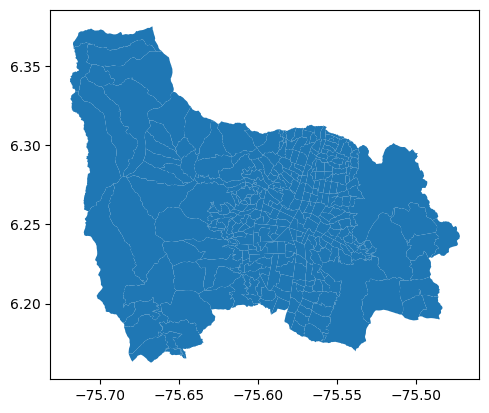

In [4]:
med_geo = gpd.read_file('med.shp')


med_geo.plot()

In [5]:

from rapidfuzz import process, fuzz

def nombres(geo, df):
    d = geo.copy()
    # Asegurarnos de que las columnas son texto
    df['barrio'] = df['barrio'].astype(str).str.strip().str.lower()
    d['NOMBRE'] = d['NOMBRE'].astype(str).str.strip().str.lower()

    # Obtener lista de nombres de referencia
    barrios_ref = d['NOMBRE'].unique().tolist()

    # Encontrar el barrio más similar
    matches = df['barrio'].apply(
        lambda x: process.extractOne(x, barrios_ref, scorer=fuzz.token_sort_ratio)
    )

    # Extraer resultados: nombre coincidente y puntuación
    df['barrio_match'] = matches.apply(lambda x: x[0] if x else None)
    df['similaridad'] = matches.apply(lambda x: x[1] if x else None)

    # Opcional: filtrar solo los que tienen alta similitud (>80)
    df['barrio_final'] = df.apply(
        lambda row: row['barrio_match'] if row['similaridad'] >= 80 else row['barrio'],
        axis=1
    )
    

    # Mostrar los primeros resultados
    print(df[['barrio', 'barrio_match', 'similaridad', 'barrio_final']].head(20))
    return df


In [6]:
def clean(geo, df, city='Medellin'):
    # Asegurar CRS estándar
    geo = geo.to_crs(epsg=4326)
    
    # Calcular centroides
    geo['geo_x'] = geo.geometry.centroid.x  # longitud
    geo['geo_y'] = geo.geometry.centroid.y  # latitud

    # Límites del polígono
    x_min, x_max = geo['geo_x'].min(), geo['geo_x'].max()
    y_min, y_max = geo['geo_y'].min(), geo['geo_y'].max()

    # Detectar coordenadas fuera de límites
    mask_out = (
        (df['longitud'] > x_max) |
        (df['longitud'] < x_min) |
        (df['latitud'] > y_max) |
        (df['latitud'] < y_min)
    )

    # Verificar que la columna 'NOMBRE' existe en geo
    if 'NOMBRE' not in geo.columns:
        raise KeyError("La columna 'NOMBRE' no existe en el GeoDataFrame proporcionado.")
    # Reemplazar coordenadas erróneas
    df_out = df[mask_out].merge(
        geo[['NOMBRE', 'geo_x', 'geo_y']],
        left_on='barrio', right_on='NOMBRE',
        how='left'
    )

    # Asegurarse de que los índices coincidan para asignación segura
    df.loc[mask_out, 'latitud'] = df_out['geo_y'].values if len(df_out) == mask_out.sum() else df_out.set_index(df_out.index)['geo_y']
    df.loc[mask_out, 'longitud'] = df_out['geo_x'].values if len(df_out) == mask_out.sum() else df_out.set_index(df_out.index)['geo_x']

    return df


In [7]:
df_clean_arr = clean(med_geo ,arriendo)
df_clean_ven = clean(med_geo, venta)

C:\Users\roman\AppData\Local\Temp\ipykernel_20288\2359384003.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['geo_x'] = geo.geometry.centroid.x  # longitud
C:\Users\roman\AppData\Local\Temp\ipykernel_20288\2359384003.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['geo_y'] = geo.geometry.centroid.y  # latitud
C:\Users\roman\AppData\Local\Temp\ipykernel_20288\2359384003.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['geo_x'] = geo.geometry.centroid.x  # longitud
C:\Users\roman\AppData\Local\Temp\ipykernel_20288\2359384003.py:7: UserWarning: Geomet

In [8]:
def geodf_arr(df):
    return gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitud, df.latitud), crs="EPSG:4326"
    )

def geodf_ven(df):
    return gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitud, df.latitud), crs="EPSG:4326"
    )


In [9]:
arriendo_geo = geodf_arr(df_clean_arr)
venta_geo = geodf_ven(df_clean_ven)

In [10]:
arriendo_geo

,barrio,precio,area,habitaciones,baños,parqueaderos,telefono,url,tipo,latitud,longitud,barrio_1,geometry
0,Robledo,1300000,65.0,4,2,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.287370,-75.601530,CUCARACHO,POINT (-75.60153 6.28737)
1,Poblado,6500000,108.0,2,2,2,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.210000,-75.558590,POBLADO,POINT (-75.55859 6.21)
2,Robledo,1400000,50.0,3,2,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.286170,-75.610950,ROBLEDO,POINT (-75.61095 6.28617)
3,Belen La Gloria,2000000,95.0,3,2,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.224870,-75.603760,BELEN LA GLORIA,POINT (-75.60376 6.22487)
4,Robledo,1200000,47.0,3,1,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.278590,-75.598380,CUCARACHO,POINT (-75.59838 6.27859)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10062,Estadio,4900000,185.0,4,4,1,3503639825,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.261097,-75.591969,ESTADIO,POINT (-75.59197 6.2611)
10063,Poblado,3600000,90.0,3,2,0,3028288809,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.204010,-75.578058,URBANIZACION VEGAS DEL POBLADO,POINT (-75.57806 6.20401)
10065,Florida Nueva,2200000,110.0,3,3,0,3187342235,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.250530,-75.596187,EL VELODROMO,POINT (-75.59619 6.25053)
10067,Laureles,1800000,72.0,3,2,0,3187342235,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.249648,-75.594648,LORENA,POINT (-75.59465 6.24965)


In [23]:
def geo_join(arriendo, venta, med_geo):
    arriendo_join = arriendo.sjoin(med_geo, how='left')
    arriendo_join.columns = arriendo_join.columns.str.lower()
    df_arr = pd.DataFrame(arriendo_join)
    venta_join = venta.sjoin(med_geo, how='left')
    venta_join.columns = venta_join.columns.str.lower()
    df_ven = pd.DataFrame(venta_join)
    return df_arr, df_ven



In [29]:
arriendo_mede, venta_mede = geo_join(arriendo_geo, venta_geo, med_geo)


In [25]:
arriendo_mede

,barrio,precio,area,habitaciones,baños,parqueaderos,telefono,url,tipo,latitud,...,codigo,nombre,abreviatur,identifica,limitecomu,zhfisicage,limitemuni,vigencia_f,subtipo_ba,link_docum
0,Robledo,1300000,65.0,4,2,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.287370,...,0724,Monteclaro,None,0724,07,None,001,None,1.0,None
1,Poblado,6500000,108.0,2,2,2,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.210000,...,1407,Las Lomas No.2,None,1407,14,None,001,None,1.0,None
2,Robledo,1400000,50.0,3,2,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.286170,...,AE1,Área de Expansión Pajarito,None,6098,60,None,001,None,2.0,None
3,Belen La Gloria,2000000,95.0,3,2,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.224870,...,1612,La Gloria,None,1612,16,None,001,None,1.0,None
4,Robledo,1200000,47.0,3,1,0,6042044890,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.278590,...,0718,Cucaracho,None,0718,07,None,001,None,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10062,Estadio,4900000,185.0,4,4,1,3503639825,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.261097,...,1113,Estadio,None,1113,11,None,001,None,1.0,None
10063,Poblado,3600000,90.0,3,2,0,3028288809,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.204010,...,1421,Patio Bonito,None,1421,14,None,001,None,1.0,None
10065,Florida Nueva,2200000,110.0,3,3,0,3187342235,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.250530,...,1112,El Velódromo,None,1112,11,None,001,None,1.0,None
10067,Laureles,1800000,72.0,3,2,0,3187342235,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.249648,...,1111,Lorena,None,1111,11,None,001,None,1.0,None


In [32]:
def arriendo_med(df):
    df = df[['tipo', 'precio', 'area', 'habitaciones', 'baños', 'parqueaderos', 'nombre']]
    df = df.dropna(subset=['nombre','habitaciones','baños'])
    return df

def venta_med(df):
    df = df[['tipo', 'precio', 'area', 'habitaciones', 'baños', 'parqueaderos', 'nombre']]
    df = df.dropna(subset=['nombre','habitaciones','baños'])
    return df


In [33]:
arr_def_mede = arriendo_med(arriendo_mede)
ven_def_mede = venta_med(venta_mede)

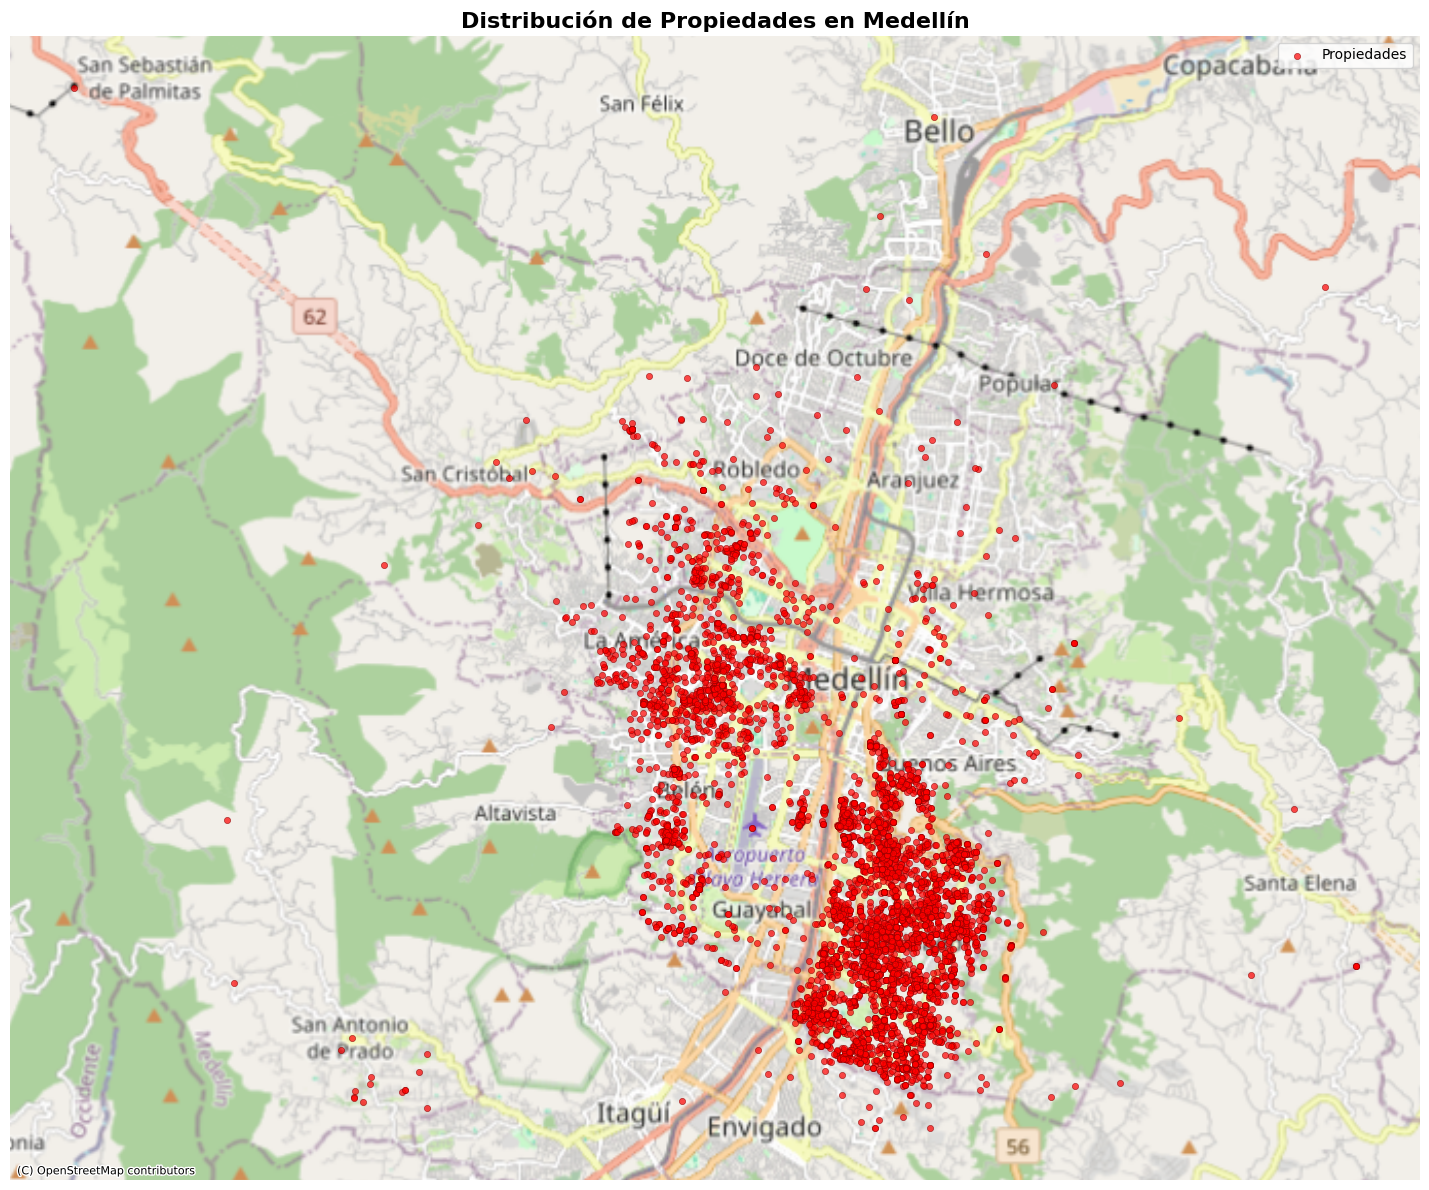

In [16]:

import matplotlib.pyplot as plt
import contextily as ctx
from shapely import wkt
import numpy as np

# Cargar los datos


# Convertir la columna geometry de string a geometría
#ult_a['geometry'] = ult_a['geometry'].apply(wkt.loads)

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(arriendo_med, geometry='geometry')

gdf_web = gdf.to_crs(epsg=4326)

# Crear el mapa
fig, ax = plt.subplots(figsize=(15, 12))

# Graficar los puntos
gdf.plot(ax=ax, color='red', markersize=20, alpha=0.7, 
           edgecolor='darkred', linewidth=0.5, label='Propiedades')

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Distribución de Propiedades en Medellín', fontsize=16, fontweight='bold')
plt.legend()
plt.axis('off')  # Ocultar ejes para mejor apariencia
plt.tight_layout()
plt.show()